In [1]:
%matplotlib inline


# Tight Layout guide


How to use tight-layout to fit plots within your figure cleanly.

*tight_layout* automatically adjusts subplot params so that the
subplot(s) fits in to the figure area. This is an experimental
feature and may not work for some cases. It only checks the extents
of ticklabels, axis labels, and titles.


Simple Example
==============

In matplotlib, the location of axes (including subplots) are specified in
normalized figure coordinates. It can happen that your axis labels or
titles (or sometimes even ticklabels) go outside the figure area, and are thus
clipped.




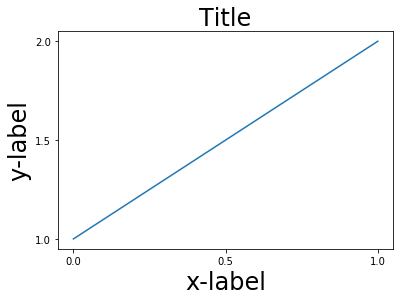

In [2]:
# sphinx_gallery_thumbnail_number = 7

import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['savefig.facecolor'] = "0.8"


def example_plot(ax, fontsize=12):
    ax.plot([1, 2])

    ax.locator_params(nbins=3)
    ax.set_xlabel('x-label', fontsize=fontsize)
    ax.set_ylabel('y-label', fontsize=fontsize)
    ax.set_title('Title', fontsize=fontsize)

plt.close('all')
fig, ax = plt.subplots()
example_plot(ax, fontsize=24)

To prevent this, the location of axes needs to be adjusted. For
subplots, this can be done by adjusting the subplot params
(`howto-subplots-adjust`). Matplotlib v1.1 introduces a new
command :func:`~matplotlib.pyplot.tight_layout` that does this
automatically for you.



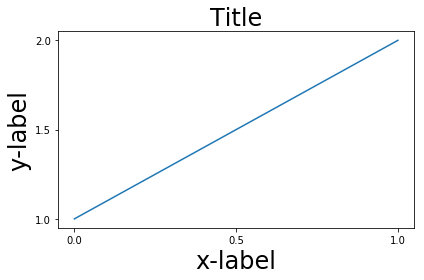

In [3]:
fig, ax = plt.subplots()
example_plot(ax, fontsize=24)
plt.tight_layout()

Note that :func:`matplotlib.pyplot.tight_layout` will only adjust the
subplot params when it is called.  In order to perform this adjustment each
time the figure is redrawn, you can call ``fig.set_tight_layout(True)``, or,
equivalently, set the ``figure.autolayout`` rcParam to ``True``.

When you have multiple subplots, often you see labels of different
axes overlapping each other.



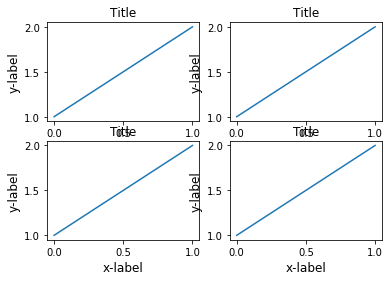

In [4]:
plt.close('all')

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
example_plot(ax1)
example_plot(ax2)
example_plot(ax3)
example_plot(ax4)

:func:`~matplotlib.pyplot.tight_layout` will also adjust spacing between
subplots to minimize the overlaps.



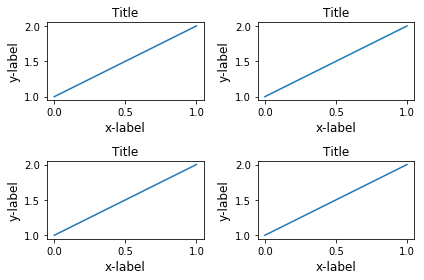

In [5]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
example_plot(ax1)
example_plot(ax2)
example_plot(ax3)
example_plot(ax4)
plt.tight_layout()

:func:`~matplotlib.pyplot.tight_layout` can take keyword arguments of
*pad*, *w_pad* and *h_pad*. These control the extra padding around the
figure border and between subplots. The pads are specified in fraction
of fontsize.



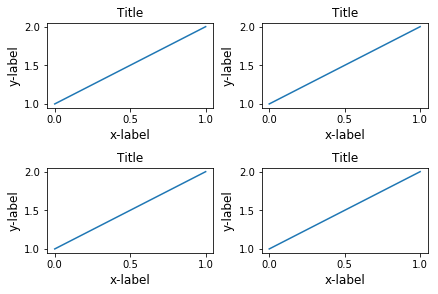

In [6]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
example_plot(ax1)
example_plot(ax2)
example_plot(ax3)
example_plot(ax4)
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

:func:`~matplotlib.pyplot.tight_layout` will work even if the sizes of
subplots are different as far as their grid specification is
compatible. In the example below, *ax1* and *ax2* are subplots of a 2x2
grid, while *ax3* is of a 1x2 grid.



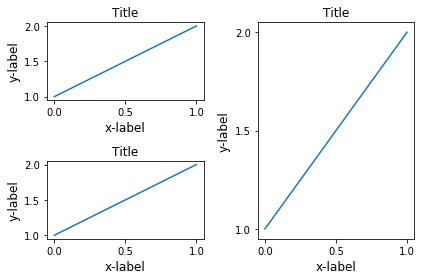

In [7]:
plt.close('all')
fig = plt.figure()

ax1 = plt.subplot(221)
ax2 = plt.subplot(223)
ax3 = plt.subplot(122)

example_plot(ax1)
example_plot(ax2)
example_plot(ax3)

plt.tight_layout()

It works with subplots created with
:func:`~matplotlib.pyplot.subplot2grid`. In general, subplots created
from the gridspec (`sphx_glr_tutorials_intermediate_gridspec.py`) will work.



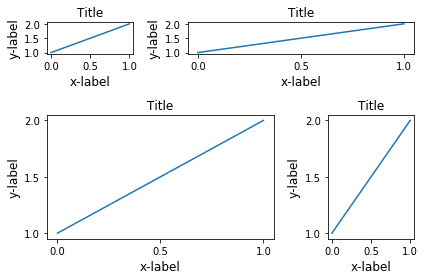

In [8]:
plt.close('all')
fig = plt.figure()

ax1 = plt.subplot2grid((3, 3), (0, 0))
ax2 = plt.subplot2grid((3, 3), (0, 1), colspan=2)
ax3 = plt.subplot2grid((3, 3), (1, 0), colspan=2, rowspan=2)
ax4 = plt.subplot2grid((3, 3), (1, 2), rowspan=2)

example_plot(ax1)
example_plot(ax2)
example_plot(ax3)
example_plot(ax4)

plt.tight_layout()

Although not thoroughly tested, it seems to work for subplots with
aspect != "auto" (e.g., axes with images).



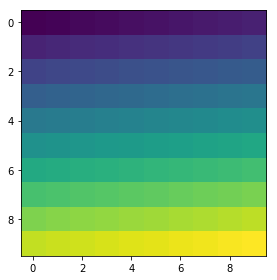

In [9]:
arr = np.arange(100).reshape((10, 10))

plt.close('all')
fig = plt.figure(figsize=(5, 4))

ax = plt.subplot(111)
im = ax.imshow(arr, interpolation="none")

plt.tight_layout()

Caveats
=======

 * :func:`~matplotlib.pyplot.tight_layout` only considers ticklabels, axis
   labels, and titles. Thus, other artists may be clipped and also may
   overlap.

 * It assumes that the extra space needed for ticklabels, axis labels,
   and titles is independent of original location of axes. This is
   often true, but there are rare cases where it is not.

 * pad=0 clips some of the texts by a few pixels. This may be a bug or
   a limitation of the current algorithm and it is not clear why it
   happens. Meanwhile, use of pad at least larger than 0.3 is
   recommended.

Use with GridSpec
=================

GridSpec has its own :func:`~matplotlib.gridspec.GridSpec.tight_layout` method
(the pyplot api :func:`~matplotlib.pyplot.tight_layout` also works).



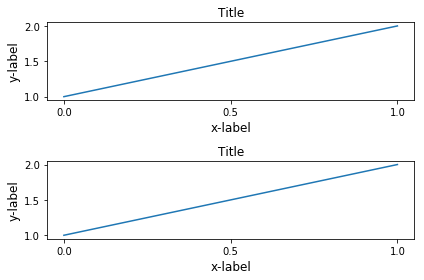

In [10]:
import matplotlib.gridspec as gridspec

plt.close('all')
fig = plt.figure()

gs1 = gridspec.GridSpec(2, 1)
ax1 = fig.add_subplot(gs1[0])
ax2 = fig.add_subplot(gs1[1])

example_plot(ax1)
example_plot(ax2)

gs1.tight_layout(fig)

You may provide an optional *rect* parameter, which specifies the bounding box
that the subplots will be fit inside. The coordinates must be in normalized
figure coordinates and the default is (0, 0, 1, 1).



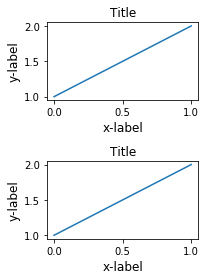

In [11]:
fig = plt.figure()

gs1 = gridspec.GridSpec(2, 1)
ax1 = fig.add_subplot(gs1[0])
ax2 = fig.add_subplot(gs1[1])

example_plot(ax1)
example_plot(ax2)

gs1.tight_layout(fig, rect=[0, 0, 0.5, 1])

For example, this can be used for a figure with multiple gridspecs.



/home/salas/miniconda3/envs/storytelling/lib/python3.6/site-packages/matplotlib/gridspec.py:314: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


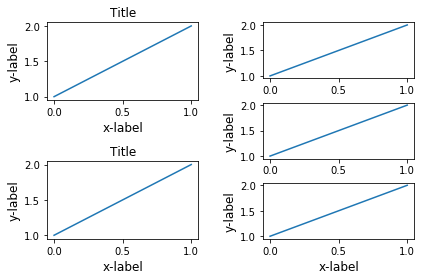

In [12]:
fig = plt.figure()

gs1 = gridspec.GridSpec(2, 1)
ax1 = fig.add_subplot(gs1[0])
ax2 = fig.add_subplot(gs1[1])

example_plot(ax1)
example_plot(ax2)

gs1.tight_layout(fig, rect=[0, 0, 0.5, 1])

gs2 = gridspec.GridSpec(3, 1)

for ss in gs2:
    ax = fig.add_subplot(ss)
    example_plot(ax)
    ax.set_title("")
    ax.set_xlabel("")

ax.set_xlabel("x-label", fontsize=12)

gs2.tight_layout(fig, rect=[0.5, 0, 1, 1], h_pad=0.5)

# We may try to match the top and bottom of two grids ::
top = min(gs1.top, gs2.top)
bottom = max(gs1.bottom, gs2.bottom)

gs1.update(top=top, bottom=bottom)
gs2.update(top=top, bottom=bottom)
plt.show()

While this should be mostly good enough, adjusting top and bottom
may require adjustment of hspace also.  To update hspace & vspace, we
call :func:`~matplotlib.gridspec.GridSpec.tight_layout` again with updated
rect argument. Note that the rect argument specifies the area including the
ticklabels, etc.  Thus, we will increase the bottom (which is 0 for the normal
case) by the difference between the *bottom* from above and the bottom of each
gridspec. Same thing for the top.



/home/salas/miniconda3/envs/storytelling/lib/python3.6/site-packages/matplotlib/gridspec.py:314: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


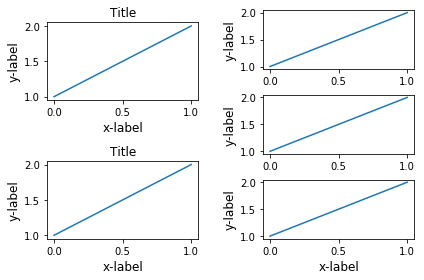

In [13]:
fig = plt.gcf()

gs1 = gridspec.GridSpec(2, 1)
ax1 = fig.add_subplot(gs1[0])
ax2 = fig.add_subplot(gs1[1])

example_plot(ax1)
example_plot(ax2)

gs1.tight_layout(fig, rect=[0, 0, 0.5, 1])

gs2 = gridspec.GridSpec(3, 1)

for ss in gs2:
    ax = fig.add_subplot(ss)
    example_plot(ax)
    ax.set_title("")
    ax.set_xlabel("")

ax.set_xlabel("x-label", fontsize=12)

gs2.tight_layout(fig, rect=[0.5, 0, 1, 1], h_pad=0.5)

top = min(gs1.top, gs2.top)
bottom = max(gs1.bottom, gs2.bottom)

gs1.update(top=top, bottom=bottom)
gs2.update(top=top, bottom=bottom)

top = min(gs1.top, gs2.top)
bottom = max(gs1.bottom, gs2.bottom)

gs1.tight_layout(fig, rect=[None, 0 + (bottom-gs1.bottom),
                            0.5, 1 - (gs1.top-top)])
gs2.tight_layout(fig, rect=[0.5, 0 + (bottom-gs2.bottom),
                            None, 1 - (gs2.top-top)],
                 h_pad=0.5)

Use with AxesGrid1
==================

While limited, the axes_grid1 toolkit is also supported.



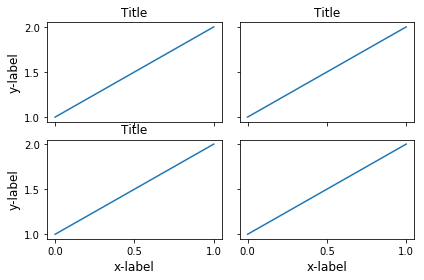

In [14]:
from mpl_toolkits.axes_grid1 import Grid

plt.close('all')
fig = plt.figure()
grid = Grid(fig, rect=111, nrows_ncols=(2, 2),
            axes_pad=0.25, label_mode='L',
            )

for ax in grid:
    example_plot(ax)
ax.title.set_visible(False)

plt.tight_layout()

Colorbar
========

If you create a colorbar with the :func:`~matplotlib.pyplot.colorbar`
command, the created colorbar is an instance of Axes, *not* Subplot, so
tight_layout does not work. With Matplotlib v1.1, you may create a
colorbar as a subplot using the gridspec.



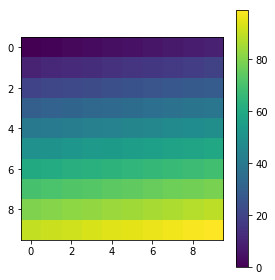

In [15]:
plt.close('all')
arr = np.arange(100).reshape((10, 10))
fig = plt.figure(figsize=(4, 4))
im = plt.imshow(arr, interpolation="none")

plt.colorbar(im, use_gridspec=True)

plt.tight_layout()

Another option is to use AxesGrid1 toolkit to
explicitly create an axes for colorbar.



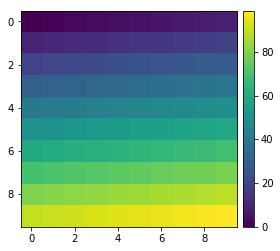

In [16]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

plt.close('all')
arr = np.arange(100).reshape((10, 10))
fig = plt.figure(figsize=(4, 4))
im = plt.imshow(arr, interpolation="none")

divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", "5%", pad="3%")
plt.colorbar(im, cax=cax)

plt.tight_layout()